In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [130]:
pd.set_option('display.max_colwidth', 90)   # 2-3 line me limit
pd.set_option('display.width', 1000)        # horizontal expand, vertical shrink

In [131]:
df = pd.read_csv("/content/movies.csv")
df.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony society,en,Avatar,"In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver Stephen Lang Michelle Rodriguez,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'department': 'Editing', 'job': 'Editor', ...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trading company love of one's life,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, has come back to life and is headed to the...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stellan Skarsg\u00e5rd Chow Yun-fat,"[{'name': 'Dariusz Wolski', 'gender': 2, 'department': 'Camera', 'job': 'Director of P...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him on a trail to uncover a sinister organiza...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""}, {""iso_639_1"": ""en"", ""name"": ""English""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux Ralph Fiennes Monica Bellucci,"[{'name': 'Thomas Newman', 'gender': 2, 'department': 'Sound', 'job': 'Original Music ...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret identity burglar,en,The Dark Knight Rises,"Following the death of District Attorney Harvey Dent, Batman assumes responsibility fo...",112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne Hathaway Tom Hardy,"[{'name': 'Hans Zimmer', 'gender': 2, 'department': 'Sound', 'job': 'Original Music Co...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel princess,en,John Carter,"John Carter is a war-weary, former military captain who's inexplicably transported to ...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Willem Dafoe Thomas Haden Church,"[{'name': 'Andrew Stanton', 'gender': 2, 'department': 'Writing', 'job': 'Screenplay',...",Andrew Stanton


## so as we see in this dataset we have some irrelevent columns so i will drop them from better performance

In [132]:
df.columns

Index(['index', 'budget', 'genres', 'homepage', 'id', 'keywords', 'original_language', 'original_title', 'overview', 'popularity', 'production_companies', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'vote_average', 'vote_count', 'cast', 'crew', 'director'], dtype='object')

#### drop title column bcz i have original_title in this data set

In [133]:
new_df = df[['budget', 'genres', 'original_language','original_title', 'popularity','release_date', 'revenue',
              'runtime', 'status','vote_average', 'vote_count', 'cast', 'director']]

In [134]:
new_df.head()

,budget,genres,original_language,original_title,popularity,release_date,revenue,runtime,status,vote_average,vote_count,cast,director
0,237000000,Action Adventure Fantasy Science Fiction,en,Avatar,150.437577,2009-12-10,2787965087,162.0,Released,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver Stephen Lang Michelle Rodriguez,James Cameron
1,300000000,Adventure Fantasy Action,en,Pirates of the Caribbean: At World's End,139.082615,2007-05-19,961000000,169.0,Released,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stellan Skarsg\u00e5rd Chow Yun-fat,Gore Verbinski
2,245000000,Action Adventure Crime,en,Spectre,107.376788,2015-10-26,880674609,148.0,Released,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux Ralph Fiennes Monica Bellucci,Sam Mendes
3,250000000,Action Crime Drama Thriller,en,The Dark Knight Rises,112.312950,2012-07-16,1084939099,165.0,Released,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne Hathaway Tom Hardy,Christopher Nolan
4,260000000,Action Adventure Science Fiction,en,John Carter,43.926995,2012-03-07,284139100,132.0,Released,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Willem Dafoe Thomas Haden Church,Andrew Stanton


In [135]:
new_df.shape

(4803, 13)

In [136]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   budget             4803 non-null   int64  
 1   genres             4775 non-null   object 
 2   original_language  4803 non-null   object 
 3   original_title     4803 non-null   object 
 4   popularity         4803 non-null   float64
 5   release_date       4802 non-null   object 
 6   revenue            4803 non-null   int64  
 7   runtime            4801 non-null   float64
 8   status             4803 non-null   object 
 9   vote_average       4803 non-null   float64
 10  vote_count         4803 non-null   int64  
 11  cast               4760 non-null   object 
 12  director           4773 non-null   object 
dtypes: float64(3), int64(3), object(7)
memory usage: 487.9+ KB


In [137]:
new_df.duplicated().sum()

np.int64(0)

In [138]:
new_df.isnull().sum()

,0
budget,0
genres,28
original_language,0
original_title,0
popularity,0
release_date,1
revenue,0
runtime,2
status,0
vote_average,0


In [139]:
# 1) Fill missing values in object columns with a custom text
new_df["genres"] = new_df["genres"].fillna("Not Available")
new_df["cast"] = new_df["cast"].fillna("Not Available")
new_df["director"] = new_df["director"].fillna("Not Available")

# 2) release_year (object) → fill with mode
new_df["release_date"] = new_df["release_date"].fillna(new_df["release_date"].mode()[0])

# 3) runtime → fill with median
new_df["runtime"] = new_df["runtime"].fillna(new_df["runtime"].median())

In [140]:
new_df.isnull().sum()

,0
budget,0
genres,0
original_language,0
original_title,0
popularity,0
release_date,0
revenue,0
runtime,0
status,0
vote_average,0


#### make release date into release year and original title to title

In [141]:
new_df = new_df.rename(columns = {"original_title": "title"})
new_df = new_df.rename(columns={"release_date": "release_year"})
new_df["release_year"] = pd.to_datetime(new_df["release_year"]).dt.year.astype(int)

In [142]:
new_df.columns

Index(['budget', 'genres', 'original_language', 'title', 'popularity', 'release_year', 'revenue', 'runtime', 'status', 'vote_average', 'vote_count', 'cast', 'director'], dtype='object')

In [143]:
new_df.head(3)

,budget,genres,original_language,title,popularity,release_year,revenue,runtime,status,vote_average,vote_count,cast,director
0,237000000,Action Adventure Fantasy Science Fiction,en,Avatar,150.437577,2009,2787965087,162.0,Released,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver Stephen Lang Michelle Rodriguez,James Cameron
1,300000000,Adventure Fantasy Action,en,Pirates of the Caribbean: At World's End,139.082615,2007,961000000,169.0,Released,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stellan Skarsg\u00e5rd Chow Yun-fat,Gore Verbinski
2,245000000,Action Adventure Crime,en,Spectre,107.376788,2015,880674609,148.0,Released,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux Ralph Fiennes Monica Bellucci,Sam Mendes


#### Now data has been cleaned, and it has no null values or duplicate values.

## EDA

### Univariet analysis

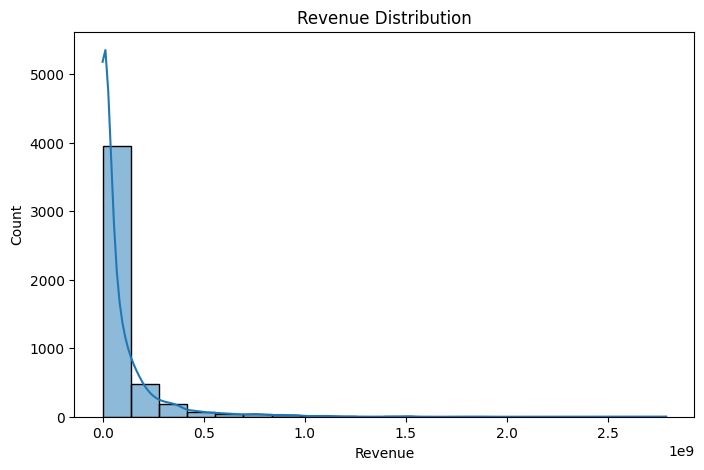

In [144]:
# From this plot, it becomes clear that most movies have low revenue, but a few big-budget movies are earning very high revenue.
plt.figure(figsize=(8,5))
sns.histplot(new_df["revenue"], bins = 20, kde=True)
plt.title("Revenue Distribution")
plt.xlabel("Revenue")
plt.show()

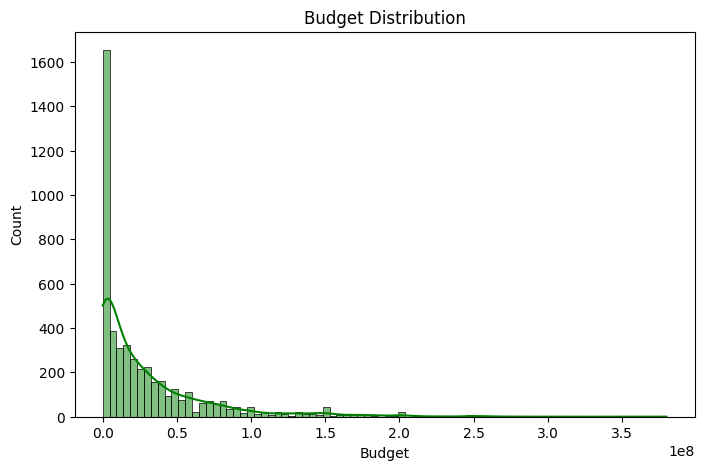

In [145]:
# High-budget movies rare hoti hain — most movies low/medium budget.
plt.figure(figsize=(8,5))
sns.histplot(new_df["budget"], kde=True, color='green')
plt.title("Budget Distribution")
plt.xlabel("Budget")
plt.show()

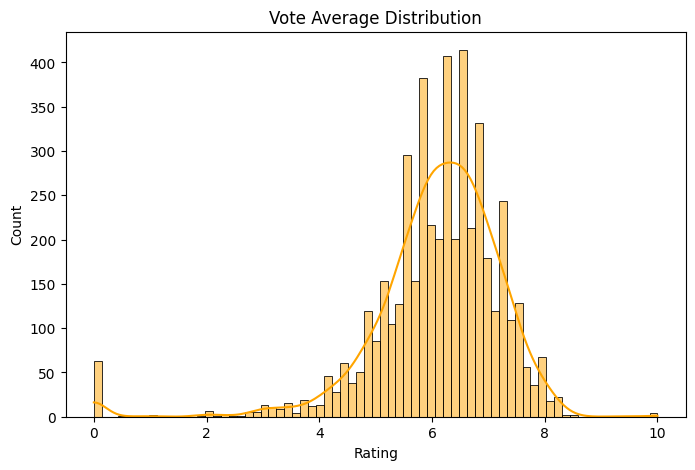

In [146]:
plt.figure(figsize=(8,5))
sns.histplot(new_df["vote_average"], kde=True, color='orange')
plt.title("Vote Average Distribution")
plt.xlabel("Rating")
plt.show()
# Ratings mostly cluster between 5 and 8.

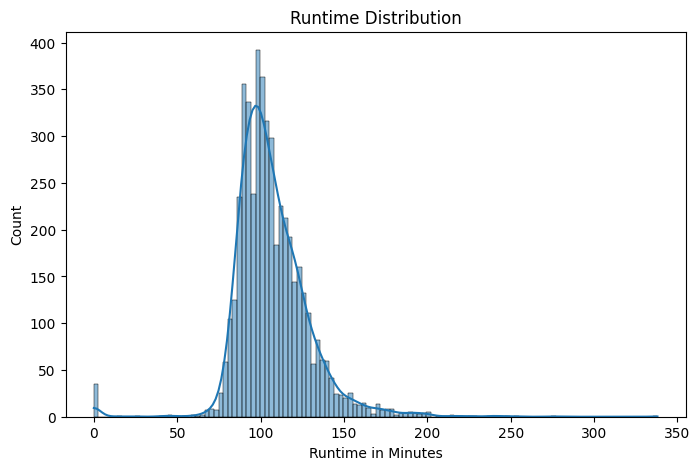

In [147]:
plt.figure(figsize=(8,5))
sns.histplot(new_df["runtime"], kde=True)
plt.title("Runtime Distribution")
plt.xlabel("Runtime in Minutes")
plt.show()
# Most movies are around 75–150 minutes long.

### Bivariat analysis

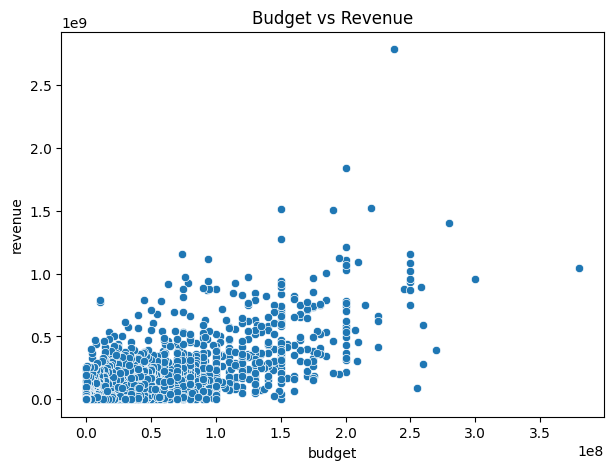

In [148]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=new_df, x="budget", y="revenue")
plt.title("Budget vs Revenue")
plt.show()
# We can see the trend — higher budget leads to higher revenue (positive correlation).

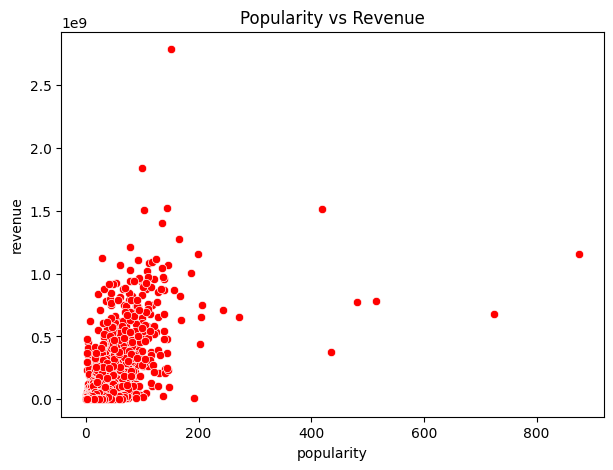

In [149]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=new_df, x="popularity", y="revenue", color='red')
plt.title("Popularity vs Revenue")
plt.show()
# Popular movies generate high revenue.

# As we can see, popular movies usually have higher revenue,
# but there are also some movies with low popularity that still earn very high revenue.

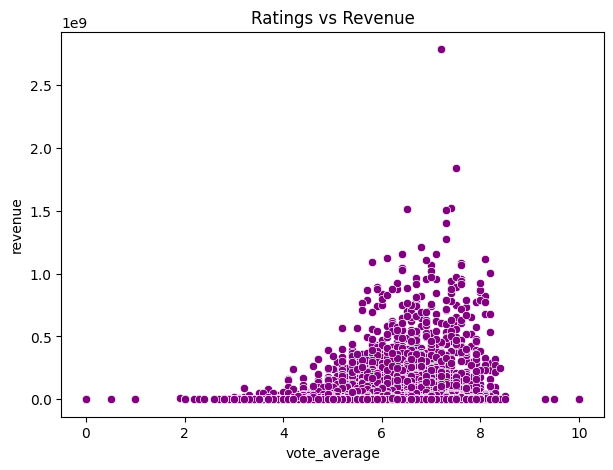

In [150]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=new_df, x="vote_average", y="revenue", color='purple')
plt.title("Ratings vs Revenue")
plt.show()
# Highly-rated movies also tend to have higher revenue.
# So, movies with ratings between 5.5 and 8.5 have very high revenue.

### Multivariat Analysis

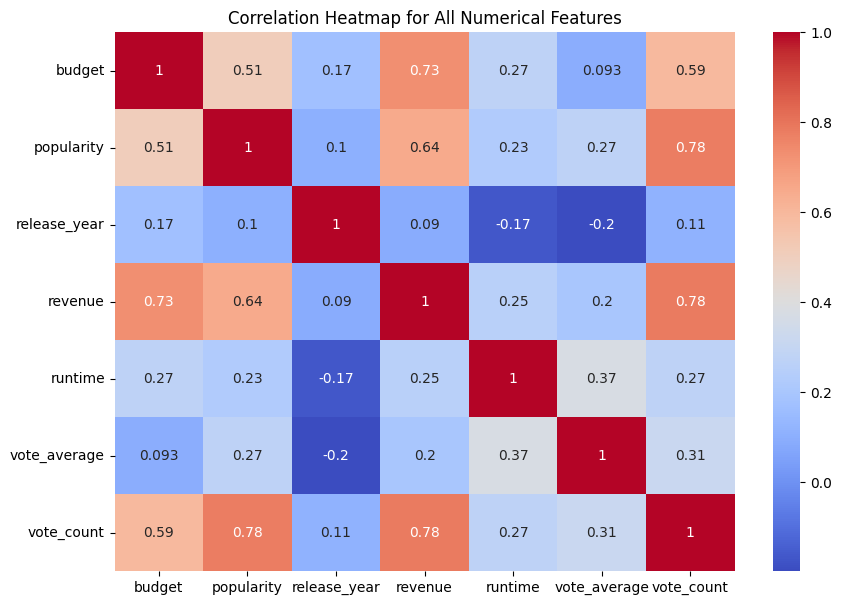

In [151]:
plt.figure(figsize=(10,7))

num_cols = new_df.select_dtypes(include=['int64', 'float64']).columns

sns.heatmap(new_df[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap for All Numerical Features")
plt.show()
# check the relation with revenue

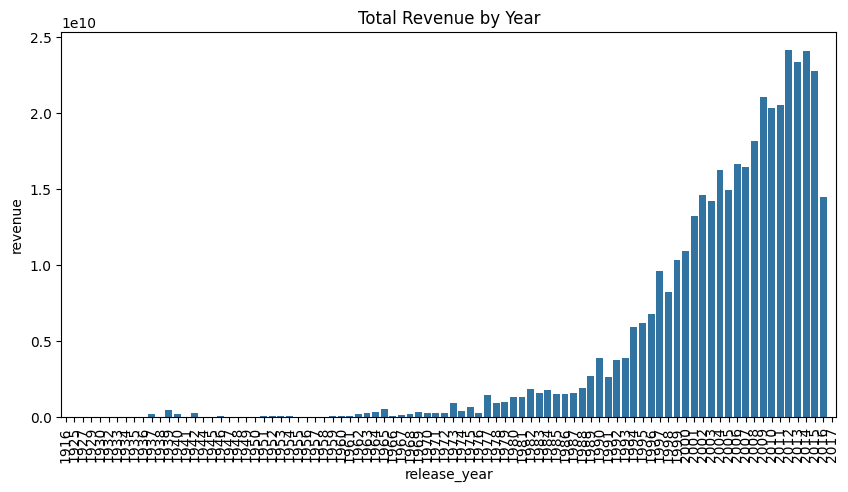

In [152]:
# Year-wise Revenue (Which year earned the most?)
yearly = new_df.groupby("release_year")["revenue"].sum().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(data=yearly, x="release_year", y="revenue")
plt.xticks(rotation=90)
plt.title("Total Revenue by Year")
plt.show()
# This plot will show which year’s movies earned the most.

#### We have many years in the dataset, which makes the bar plot hard to interpret, so now we have taken the top 15 years with the highest total revenue

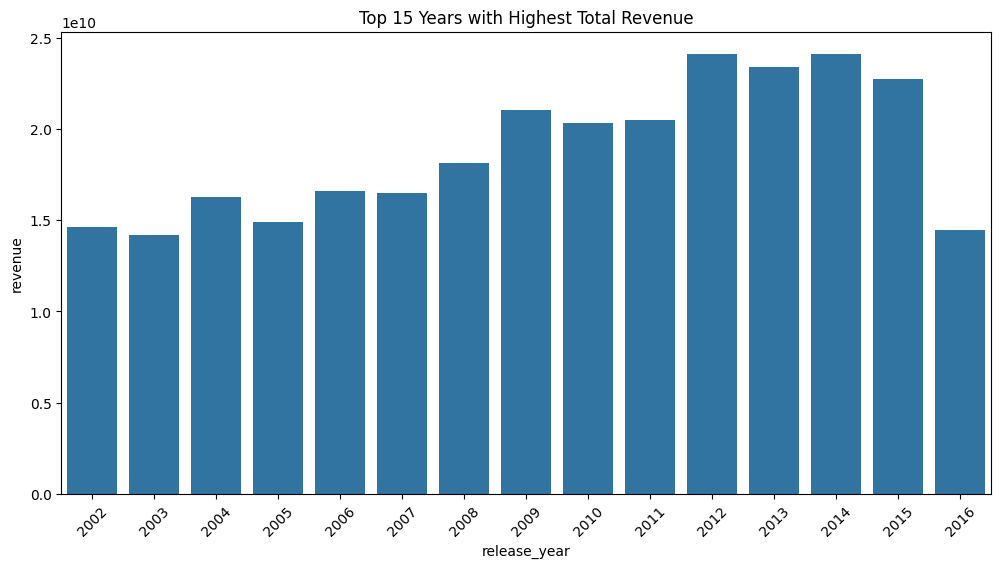

In [153]:
yearly = (
    new_df.groupby("release_year")["revenue"]
    .sum()
    .reset_index()
    .sort_values("revenue", ascending=False)
    .head(15)
)

plt.figure(figsize=(12,6))
sns.barplot(data=yearly, x="release_year", y="revenue")
plt.xticks(rotation=45)
plt.title("Top 15 Years with Highest Total Revenue")
plt.show()
# le9 means billion and le6 means million is dollars

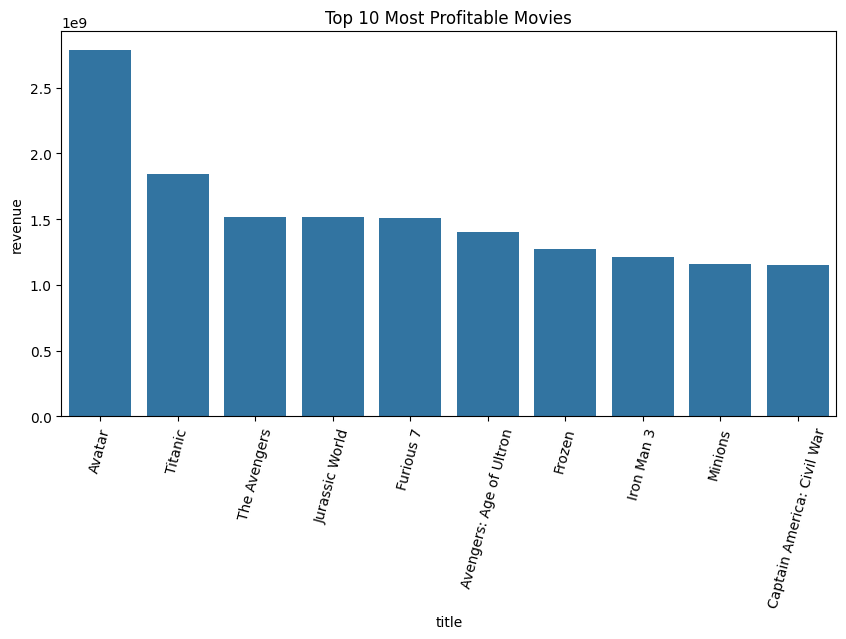

In [154]:
# Top 10 Highest Revenue Movies
top10 = new_df.sort_values("revenue", ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(data=top10, x="title", y="revenue")
plt.xticks(rotation=75)
plt.title("Top 10 Most Profitable Movies")
plt.show()

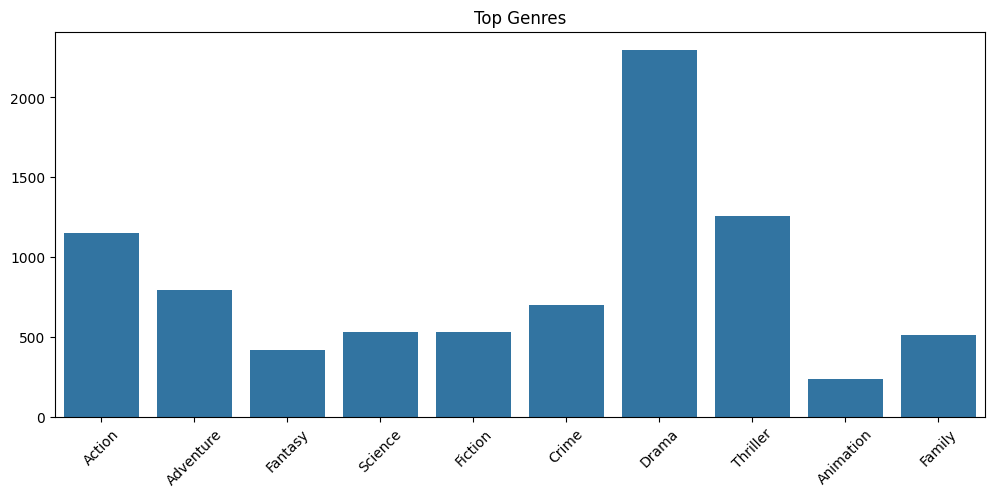

In [155]:
from collections import Counter

genre_list = new_df['genres'].str.split(' ').sum()
genre_counts = Counter(genre_list)

plt.figure(figsize=(12,5))
sns.barplot(x=list(genre_counts.keys())[:10], y=list(genre_counts.values())[:10])
plt.title("Top Genres")
plt.xticks(rotation=45)
plt.show()
# The top 10 movie genres are shown, indicating how many movies of each genre are in our data.

In [156]:
new_df['original_language'].unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [157]:
# 1) Create mapping dictionary
lang_map = {
    'en': 'English',
    'ja': 'Japanese',
    'fr': 'French',
    'zh': 'Chinese',
    'es': 'Spanish',
    'de': 'German',
    'hi': 'Hindi',
    'ru': 'Russian',
    'ko': 'Korean',
    'te': 'Telugu',
    'cn': 'Chinese',
    'it': 'Italian',
    'nl': 'Dutch',
    'ta': 'Tamil',
    'sv': 'Swedish',
    'th': 'Thai',
    'da': 'Danish',
    'xx': 'Unknown',
    'hu': 'Hungarian',
    'cs': 'Czech',
    'pt': 'Portuguese',
    'is': 'Icelandic',
    'tr': 'Turkish',
    'nb': 'Norwegian Bokmål',
    'af': 'Afrikaans',
    'pl': 'Polish',
    'he': 'Hebrew',
    'ar': 'Arabic',
    'vi': 'Vietnamese',
    'ky': 'Kyrgyz',
    'id': 'Indonesian',
    'ro': 'Romanian',
    'fa': 'Persian',
    'no': 'Norwegian',
    'sl': 'Slovenian',
    'ps': 'Pashto',
    'el': 'Greek'
}

# 2) Replace codes with full names
new_df['original_language'] = new_df['original_language'].map(lang_map)


In [158]:
new_df['original_language'].unique()

array(['English', 'Japanese', 'French', 'Chinese', 'Spanish', 'German',
       'Hindi', 'Russian', 'Korean', 'Telugu', 'Italian', 'Dutch',
       'Tamil', 'Swedish', 'Thai', 'Danish', 'Unknown', 'Hungarian',
       'Czech', 'Portuguese', 'Icelandic', 'Turkish', 'Norwegian Bokmål',
       'Afrikaans', 'Polish', 'Hebrew', 'Arabic', 'Vietnamese', 'Kyrgyz',
       'Indonesian', 'Romanian', 'Persian', 'Norwegian', 'Slovenian',
       'Pashto', 'Greek'], dtype=object)

In [159]:
new_df.columns

Index(['budget', 'genres', 'original_language', 'title', 'popularity', 'release_year', 'revenue', 'runtime', 'status', 'vote_average', 'vote_count', 'cast', 'director'], dtype='object')

#### Top 10 movies in English and Hindi by revenue.

In [160]:
import warnings
warnings.filterwarnings("ignore")

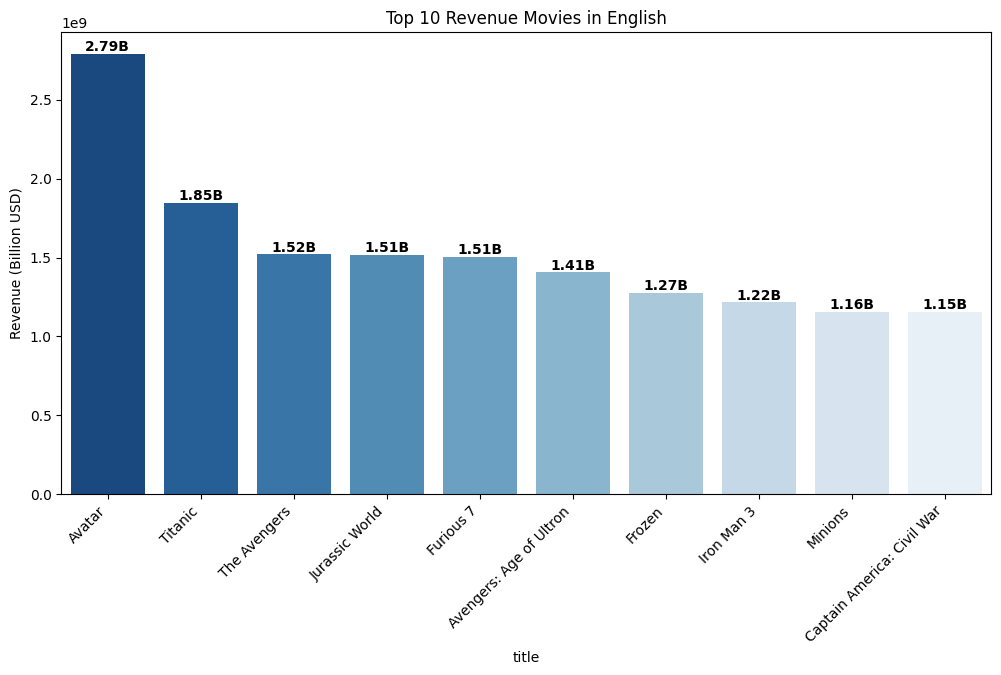

In [161]:
# Font fix for Hindi (won't affect English)
plt.rcParams['font.family'] = 'DejaVu Sans'

# Filter English movies
english_df = new_df[new_df['original_language'] == 'English']

# Top 10 revenue movies
top10_eng = english_df.nlargest(10, 'revenue')

# Plot
plt.figure(figsize=(12,6))
bar = sns.barplot(data=top10_eng, x='title', y='revenue', palette='Blues_r')

# Annotate revenue on top of bars (in Billion USD)
for p in bar.patches:
    bar.annotate(f'{p.get_height()/1e9:.2f}B',
                 (p.get_x() + p.get_width()/2., p.get_height()),
                 ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.xticks(rotation=45, ha='right')
plt.ylabel("Revenue (Billion USD)")
plt.title("Top 10 Revenue Movies in English")
plt.show()

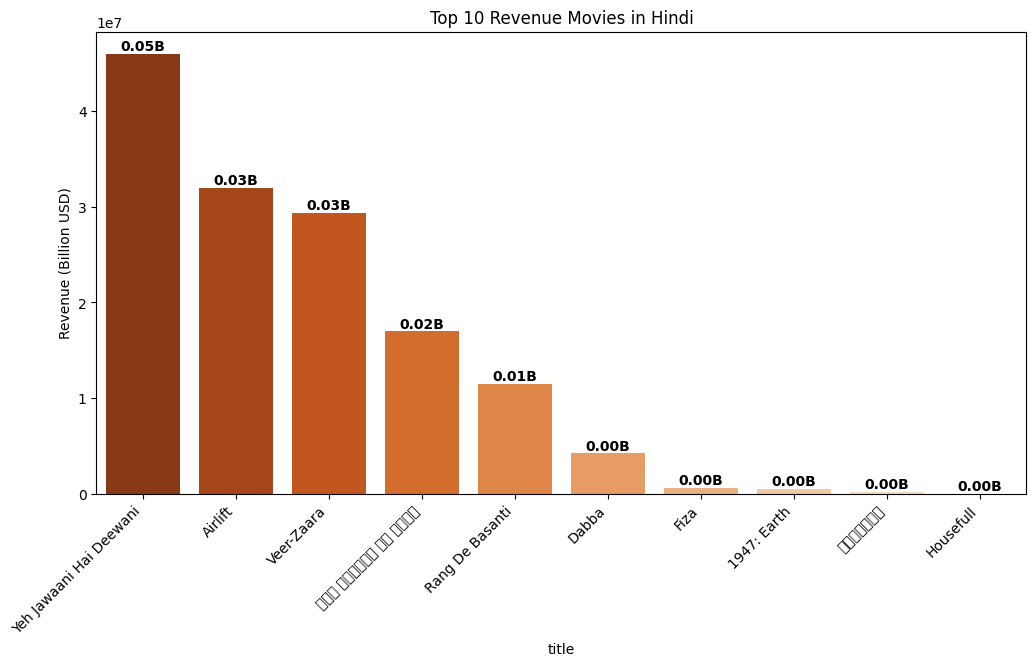

In [162]:
# Filter Hindi movies
hindi_df = new_df[new_df['original_language'] == 'Hindi']

# Top 10 revenue movies
top10_hin = hindi_df.nlargest(10, 'revenue')

# Plot
plt.figure(figsize=(12,6))
bar = sns.barplot(data=top10_hin, x='title', y='revenue', palette='Oranges_r')

# Annotate revenue on top of bars (in Billion USD)
for p in bar.patches:
    bar.annotate(f'{p.get_height()/1e9:.2f}B',
                 (p.get_x() + p.get_width()/2., p.get_height()),
                 ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.xticks(rotation=45, ha='right')
plt.ylabel("Revenue (Billion USD)")
plt.title("Top 10 Revenue Movies in Hindi")
plt.show()

#### top 10 english movies by ratings

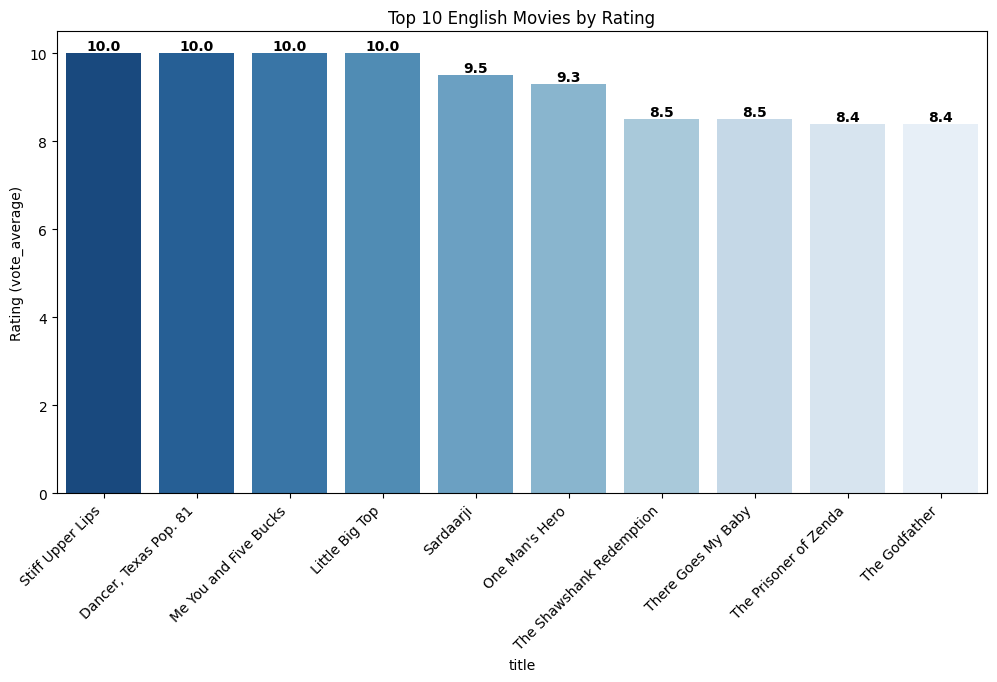

In [163]:
# Filter English movies
english_df = new_df[new_df['original_language'] == 'English']

# Top 10 movies by rating
top10_eng = english_df.nlargest(10, 'vote_average')

# Plot
plt.figure(figsize=(12,6))
bar = sns.barplot(data=top10_eng, x='title', y='vote_average', palette='Blues_r')

# Annotate rating on top of bars
for p in bar.patches:
    bar.annotate(f'{p.get_height():.1f}',
                 (p.get_x() + p.get_width()/2., p.get_height()),
                 ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.xticks(rotation=45, ha='right')
plt.ylabel("Rating (vote_average)")
plt.title("Top 10 English Movies by Rating")
plt.show()

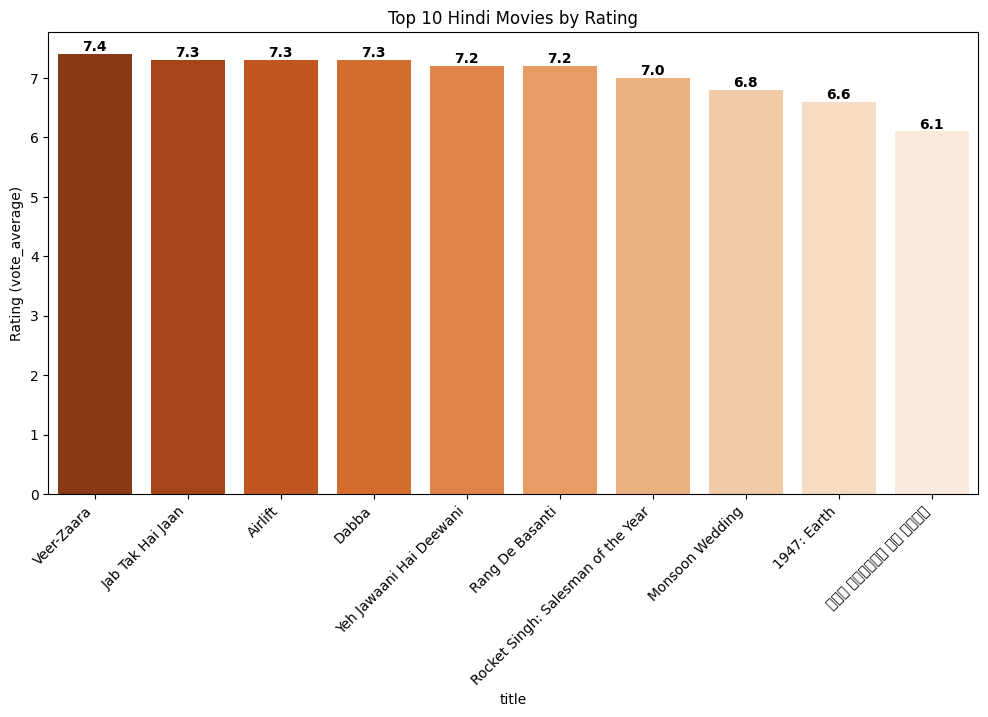

In [164]:
# Hindi Top 10 Movies by Rating
hindi_df = new_df[new_df['original_language'] == 'Hindi']

# Top 10 movies by rating
top10_hin = hindi_df.nlargest(10, 'vote_average')

# Plot
plt.figure(figsize=(12,6))
bar = sns.barplot(data=top10_hin, x='title', y='vote_average', palette='Oranges_r')

# Annotate rating on top of bars
for p in bar.patches:
    bar.annotate(f'{p.get_height():.1f}',
                 (p.get_x() + p.get_width()/2., p.get_height()),
                 ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.xticks(rotation=45, ha='right')
plt.ylabel("Rating (vote_average)")
plt.title("Top 10 Hindi Movies by Rating")
plt.show()

We are finding the Top 5 years with the highest total revenue.
For each of those 5 years:

Top English movie (highest revenue in that year)

Top Hindi movie (highest revenue in that year)

Top overall movie (highest revenue overall in that year — any language)


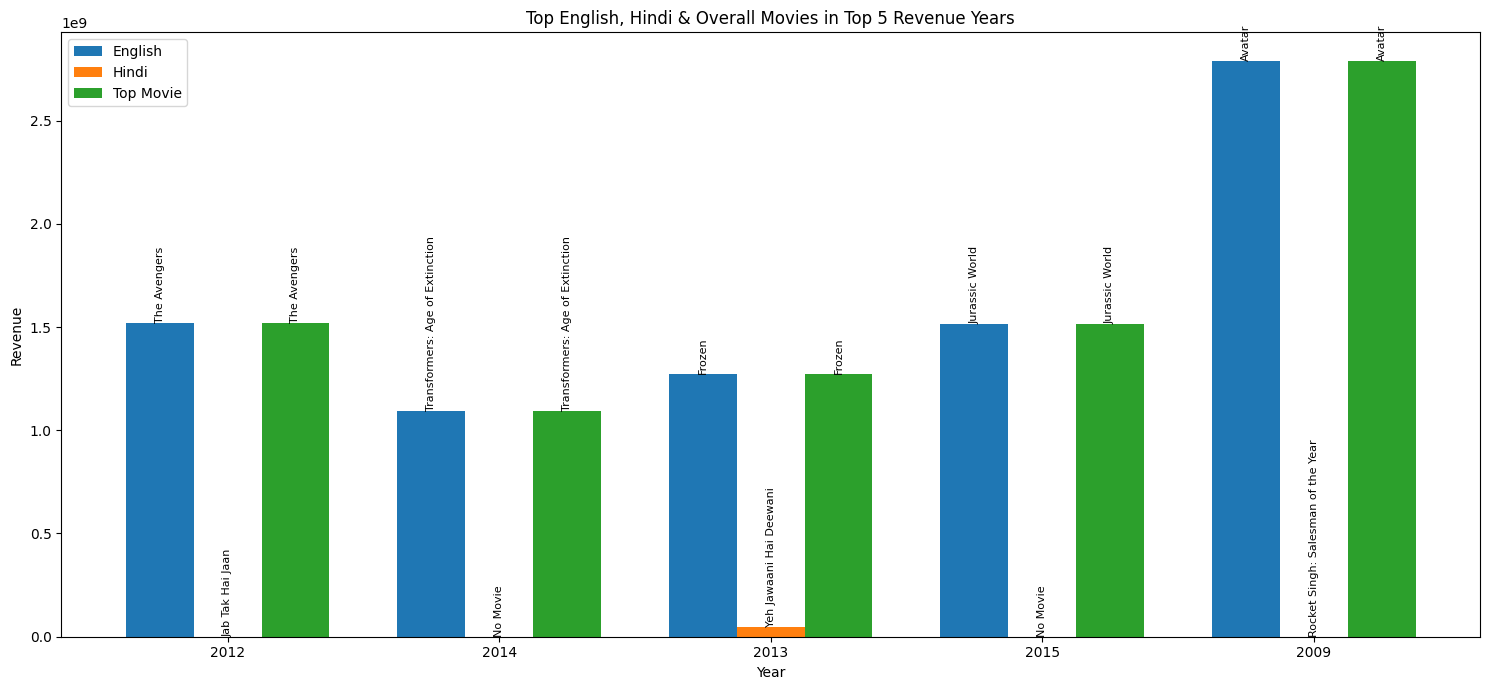

In [165]:
# 1. Top 5 revenue years
top5_years = (
    new_df.groupby("release_year")["revenue"]
          .sum()
          .sort_values(ascending=False)
          .head(5)
          .index
)

# 2. Function to get top movie for a year & language
def get_top_movie(year, lang=None):
    df = new_df[new_df["release_year"] == year]

    if lang:  # English or Hindi filter
        df = df[df["original_language"] == lang]

    if df.empty:
        return ("No Movie", 0)

    row = df.sort_values("revenue", ascending=False).iloc[0]
    return (row["title"], row["revenue"])

# 3. Prepare lists
years = []
eng_rev = []
hin_rev = []
top_rev = []
eng_name = []
hin_name = []
top_name = []

for year in top5_years:
    years.append(year)

    e_name, e_rev = get_top_movie(year, "English")
    h_name, h_rev = get_top_movie(year, "Hindi")
    t_name, t_rev = get_top_movie(year, None)

    eng_rev.append(e_rev)
    hin_rev.append(h_rev)
    top_rev.append(t_rev)

    eng_name.append(e_name)
    hin_name.append(h_name)
    top_name.append(t_name)

# 4. Plot grouped bar chart
x = np.arange(len(years))
width = 0.25

plt.figure(figsize=(15, 7))

b1 = plt.bar(x - width, eng_rev, width, label='English')
b2 = plt.bar(x,        hin_rev, width, label='Hindi')
b3 = plt.bar(x + width, top_rev, width, label='Top Movie')

# 5. Add movie names on bars
def add_labels(bars, names):
    for bar, name in zip(bars, names):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height,
                 name, ha='center', va='bottom', fontsize=8, rotation=90)

add_labels(b1, eng_name)
add_labels(b2, hin_name)
add_labels(b3, top_name)

plt.xticks(x, years)
plt.xlabel("Year")
plt.ylabel("Revenue")
plt.title("Top English, Hindi & Overall Movies in Top 5 Revenue Years")
plt.legend()
plt.tight_layout()
plt.show()


# group bar chart by revenue

In [166]:
new_df.columns

Index(['budget', 'genres', 'original_language', 'title', 'popularity', 'release_year', 'revenue', 'runtime', 'status', 'vote_average', 'vote_count', 'cast', 'director'], dtype='object')

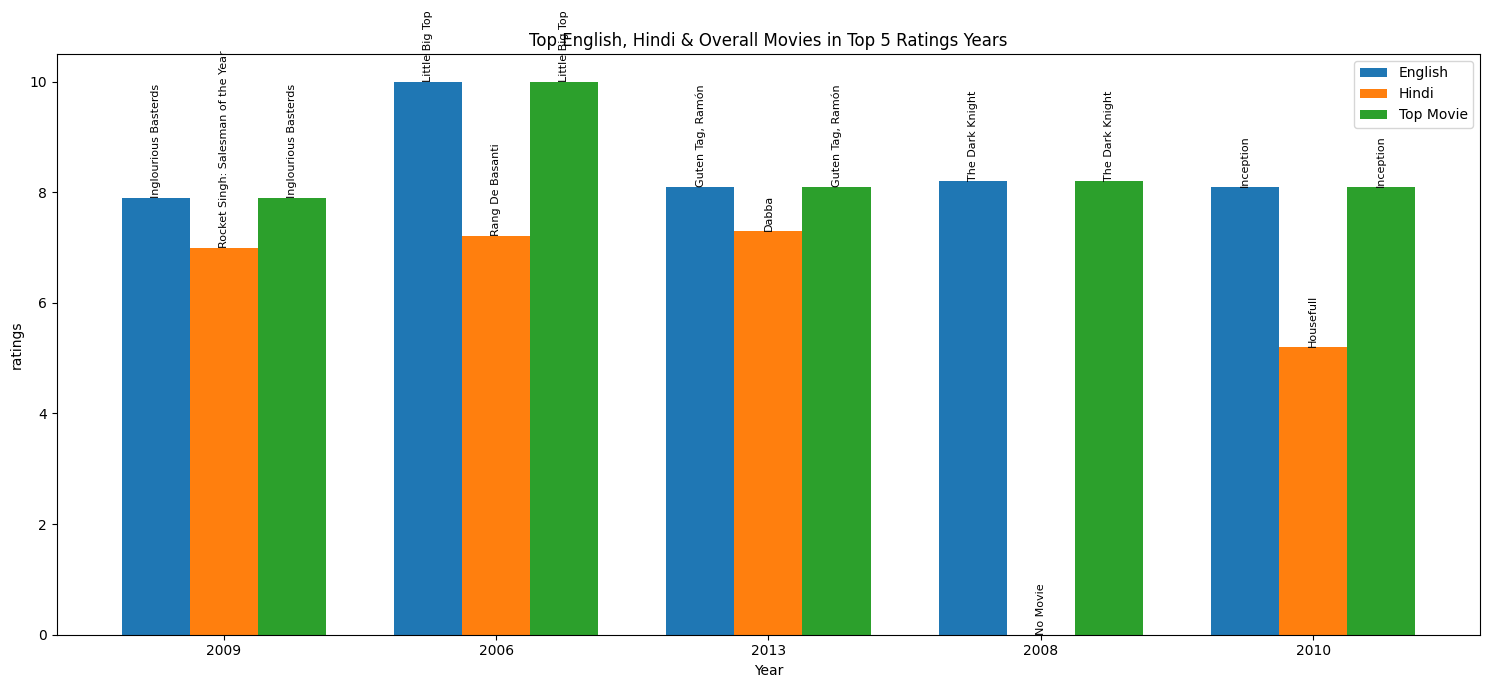

In [167]:
# 1. Top 5 ratings years
top5_years = (
    new_df.groupby("release_year")["vote_average"]
          .sum()
          .sort_values(ascending=False)
          .head(5)
          .index
)

# 2. Function to get top movie for a year & language
def get_top_movie(year, lang=None):
    df = new_df[new_df["release_year"] == year]

    if lang:  # English or Hindi filter
        df = df[df["original_language"] == lang]

    if df.empty:
        return ("No Movie", 0)

    row = df.sort_values("vote_average", ascending=False).iloc[0]
    return (row["title"], row["vote_average"])

# 3. Prepare lists
years = []
eng_rev = []
hin_rev = []
top_rev = []
eng_name = []
hin_name = []
top_name = []

for year in top5_years:
    years.append(year)

    e_name, e_rev = get_top_movie(year, "English")
    h_name, h_rev = get_top_movie(year, "Hindi")
    t_name, t_rev = get_top_movie(year, None)

    eng_rev.append(e_rev)
    hin_rev.append(h_rev)
    top_rev.append(t_rev)

    eng_name.append(e_name)
    hin_name.append(h_name)
    top_name.append(t_name)

# 4. Plot grouped bar chart
x = np.arange(len(years))
width = 0.25

plt.figure(figsize=(15, 7))

b1 = plt.bar(x - width, eng_rev, width, label='English')
b2 = plt.bar(x,        hin_rev, width, label='Hindi')
b3 = plt.bar(x + width, top_rev, width, label='Top Movie')

# 5. Add movie names on bars
def add_labels(bars, names):
    for bar, name in zip(bars, names):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height,
                 name, ha='center', va='bottom', fontsize=8, rotation=90)

add_labels(b1, eng_name)
add_labels(b2, hin_name)
add_labels(b3, top_name)

plt.xticks(x, years)
plt.xlabel("Year")
plt.ylabel("ratings")
plt.title("Top English, Hindi & Overall Movies in Top 5 Ratings Years")
plt.legend()
plt.tight_layout()
plt.show()


### Final Clean Code — Top 10 Movies (Highest Revenue) with Budget vs Revenue

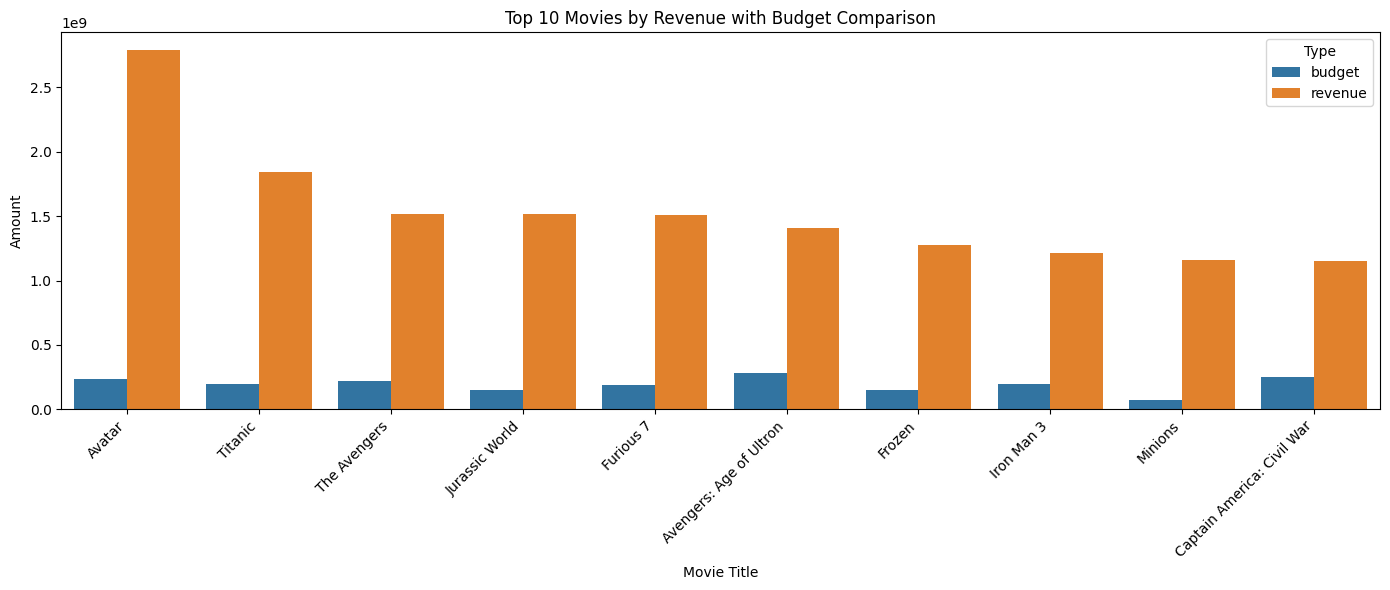

In [168]:
# Top 10 movies by revenue
top10 = new_df.nlargest(10, "revenue")[["title", "revenue", "budget"]]

# Melt the data for grouped bar chart
plot_df = top10.melt(id_vars="title", value_vars=["budget", "revenue"],
                     var_name="Type", value_name="Amount")

plt.figure(figsize=(14,6))
sns.barplot(data=plot_df, x="title", y="Amount", hue="Type")

plt.xticks(rotation=45, ha='right')
plt.title("Top 10 Movies by Revenue with Budget Comparison")
plt.ylabel("Amount")
plt.xlabel("Movie Title")
plt.tight_layout()
plt.show()

## The EDA part is done; now we will build the model.

In [169]:
new_df.head()

,budget,genres,original_language,title,popularity,release_year,revenue,runtime,status,vote_average,vote_count,cast,director
0,237000000,Action Adventure Fantasy Science Fiction,English,Avatar,150.437577,2009,2787965087,162.0,Released,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver Stephen Lang Michelle Rodriguez,James Cameron
1,300000000,Adventure Fantasy Action,English,Pirates of the Caribbean: At World's End,139.082615,2007,961000000,169.0,Released,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stellan Skarsg\u00e5rd Chow Yun-fat,Gore Verbinski
2,245000000,Action Adventure Crime,English,Spectre,107.376788,2015,880674609,148.0,Released,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux Ralph Fiennes Monica Bellucci,Sam Mendes
3,250000000,Action Crime Drama Thriller,English,The Dark Knight Rises,112.312950,2012,1084939099,165.0,Released,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne Hathaway Tom Hardy,Christopher Nolan
4,260000000,Action Adventure Science Fiction,English,John Carter,43.926995,2012,284139100,132.0,Released,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Willem Dafoe Thomas Haden Church,Andrew Stanton


## Feature Extraction

#### Now, from the genre column, I am separating all the genres and creating a new column for each genre.

---



In [170]:
df2 = new_df.copy()

In [171]:
# Genres ko list me convert karna
df2["genres_list"] = df2["genres"].str.split()

# Now convert genres into separate columns (one-hot encoding)
genre_dummies = df2["genres_list"].explode().str.get_dummies().groupby(level=0).sum()

# Add these new columns to the dataframe
df2 = pd.concat([df2, genre_dummies], axis=1)

# remove the temporary list column
df2.drop(columns=["genres_list", "genres"], inplace=True)


df2.head()

,budget,original_language,title,popularity,release_year,revenue,runtime,status,vote_average,vote_count,...,Movie,Music,Mystery,Not,Romance,Science,TV,Thriller,War,Western
0,237000000,English,Avatar,150.437577,2009,2787965087,162.0,Released,7.2,11800,...,0,0,0,0,0,1,0,0,0,0
1,300000000,English,Pirates of the Caribbean: At World's End,139.082615,2007,961000000,169.0,Released,6.9,4500,...,0,0,0,0,0,0,0,0,0,0
2,245000000,English,Spectre,107.376788,2015,880674609,148.0,Released,6.3,4466,...,0,0,0,0,0,0,0,0,0,0
3,250000000,English,The Dark Knight Rises,112.312950,2012,1084939099,165.0,Released,7.6,9106,...,0,0,0,0,0,0,0,1,0,0
4,260000000,English,John Carter,43.926995,2012,284139100,132.0,Released,6.1,2124,...,0,0,0,0,0,1,0,0,0,0


In [172]:
df2.columns

Index(['budget', 'original_language', 'title', 'popularity', 'release_year', 'revenue', 'runtime', 'status', 'vote_average', 'vote_count', 'cast', 'director', 'Action', 'Adventure', 'Animation', 'Available', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Fiction', 'Foreign', 'History', 'Horror', 'Movie', 'Music', 'Mystery', 'Not', 'Romance', 'Science', 'TV', 'Thriller', 'War', 'Western'], dtype='object')

In [173]:
# original_language ka one-hot encode → 0/1
lang_dummies = pd.get_dummies(df2["original_language"], prefix="lang").astype(int)

# status ka one-hot encode → 0/1
status_dummies = pd.get_dummies(df2["status"], prefix="status").astype(int)

# Add these encoded columns
df2 = pd.concat([df2, lang_dummies, status_dummies], axis=1)
df2.drop(columns=["original_language", "status"], inplace=True)

df2.head()

,budget,title,popularity,release_year,revenue,runtime,vote_average,vote_count,cast,director,...,lang_Swedish,lang_Tamil,lang_Telugu,lang_Thai,lang_Turkish,lang_Unknown,lang_Vietnamese,status_Post Production,status_Released,status_Rumored
0,237000000,Avatar,150.437577,2009,2787965087,162.0,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver Stephen Lang Michelle Rodriguez,James Cameron,...,0,0,0,0,0,0,0,0,1,0
1,300000000,Pirates of the Caribbean: At World's End,139.082615,2007,961000000,169.0,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stellan Skarsg\u00e5rd Chow Yun-fat,Gore Verbinski,...,0,0,0,0,0,0,0,0,1,0
2,245000000,Spectre,107.376788,2015,880674609,148.0,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux Ralph Fiennes Monica Bellucci,Sam Mendes,...,0,0,0,0,0,0,0,0,1,0
3,250000000,The Dark Knight Rises,112.312950,2012,1084939099,165.0,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne Hathaway Tom Hardy,Christopher Nolan,...,0,0,0,0,0,0,0,0,1,0
4,260000000,John Carter,43.926995,2012,284139100,132.0,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Willem Dafoe Thomas Haden Church,Andrew Stanton,...,0,0,0,0,0,0,0,0,1,0


In [174]:
df2.columns

Index(['budget', 'title', 'popularity', 'release_year', 'revenue', 'runtime', 'vote_average', 'vote_count', 'cast', 'director', 'Action', 'Adventure', 'Animation', 'Available', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Fiction', 'Foreign', 'History', 'Horror', 'Movie', 'Music', 'Mystery', 'Not', 'Romance', 'Science', 'TV', 'Thriller', 'War', 'Western', 'lang_Afrikaans', 'lang_Arabic', 'lang_Chinese', 'lang_Czech', 'lang_Danish', 'lang_Dutch', 'lang_English', 'lang_French', 'lang_German', 'lang_Greek', 'lang_Hebrew', 'lang_Hindi', 'lang_Hungarian', 'lang_Icelandic', 'lang_Indonesian', 'lang_Italian', 'lang_Japanese', 'lang_Korean', 'lang_Kyrgyz', 'lang_Norwegian', 'lang_Norwegian Bokmål', 'lang_Pashto', 'lang_Persian', 'lang_Polish', 'lang_Portuguese', 'lang_Romanian', 'lang_Russian', 'lang_Slovenian', 'lang_Spanish', 'lang_Swedish', 'lang_Tamil', 'lang_Telugu', 'lang_Thai', 'lang_Turkish', 'lang_Unknown', 'lang_Vietnamese', 'status_Post Production',
       'statu

### I am dropping the object columns because they are not useful for the model, but they will be needed in the app, so I will use them there.

In [175]:
# STEP 1: Handle object columns properly
# Identify the object columns you want to keep for recommendation system
text_columns = ["title", "cast", "director"]

# Keep the original dataframe for recommendation system
reco_df = df2.copy()

# For model training, remove text columns because ML cannot use them directly
model_df = df2.drop(columns=text_columns)

In [176]:
model_df.columns

Index(['budget', 'popularity', 'release_year', 'revenue', 'runtime', 'vote_average', 'vote_count', 'Action', 'Adventure', 'Animation', 'Available', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Fiction', 'Foreign', 'History', 'Horror', 'Movie', 'Music', 'Mystery', 'Not', 'Romance', 'Science', 'TV', 'Thriller', 'War', 'Western', 'lang_Afrikaans', 'lang_Arabic', 'lang_Chinese', 'lang_Czech', 'lang_Danish', 'lang_Dutch', 'lang_English', 'lang_French', 'lang_German', 'lang_Greek', 'lang_Hebrew', 'lang_Hindi', 'lang_Hungarian', 'lang_Icelandic', 'lang_Indonesian', 'lang_Italian', 'lang_Japanese', 'lang_Korean', 'lang_Kyrgyz', 'lang_Norwegian', 'lang_Norwegian Bokmål', 'lang_Pashto', 'lang_Persian', 'lang_Polish', 'lang_Portuguese', 'lang_Romanian', 'lang_Russian', 'lang_Slovenian', 'lang_Spanish', 'lang_Swedish', 'lang_Tamil', 'lang_Telugu', 'lang_Thai', 'lang_Turkish', 'lang_Unknown', 'lang_Vietnamese', 'status_Post Production', 'status_Released', 'status_Rumored'], dtyp

In [177]:
# Step 1: Split features (X) and target (y)
y = model_df["revenue"]       # output
X = model_df.drop("revenue", axis=1)   # all input features

In [178]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [179]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error

In [180]:
models = {
    "LinearRegression": LinearRegression(),
    "RandomForest": RandomForestRegressor(),
    "GradientBoosting": GradientBoostingRegressor(),
    "SVR": SVR(),
    "KNN": KNeighborsRegressor()
}

results = {}

for name, model in models.items():
    pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("model", model)
    ])

    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)

    r2 = r2_score(y_test, preds)
    mae = mean_absolute_error(y_test, preds)

    results[name] = {"R2 Score": r2, "MAE": mae}

results


{'LinearRegression': {'R2 Score': 0.761328996344635, 'MAE': 46925313.56081847},
 'RandomForest': {'R2 Score': 0.7738268340379226, 'MAE': 37138755.31407908},
 'GradientBoosting': {'R2 Score': 0.7385942876424051,
  'MAE': 39874428.798245065},
 'SVR': {'R2 Score': -0.16434199714999131, 'MAE': 82349805.19007106},
 'KNN': {'R2 Score': 0.7682083774571902, 'MAE': 45348344.64745057}}

In [181]:
import pandas as pd
results_df = pd.DataFrame(results).T
print(results_df)

                  R2 Score           MAE
LinearRegression  0.761329  4.692531e+07
RandomForest      0.773827  3.713876e+07
GradientBoosting  0.738594  3.987443e+07
SVR              -0.164342  8.234981e+07
KNN               0.768208  4.534834e+07


#### I evaluated multiple regression algorithms, including Linear Regression, Random Forest, Gradient Boosting, SVR, and KNN, using R² and Mean Absolute Error (MAE) as performance metrics. Although Linear Regression achieved a slightly higher R² score, indicating that it captured more overall variance in the data, its MAE was significantly higher, meaning its actual revenue predictions were farther from the true values. In contrast, the Random Forest model achieved the lowest MAE among all algorithms, demonstrating that its predictions were consistently closer to the real revenue values. Since MAE is a more reliable measure of real-world prediction accuracy—especially when working with large revenue values—the Random Forest model was chosen as the final model due to its superior error performance and better handling of non-linear patterns in the dataset.

### make new model on Random Forest

In [182]:
# Step 1: Split data
y = model_df["revenue"]
X = model_df.drop("revenue", axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [183]:
# Step 2: RF pipeline
rf_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("model", RandomForestRegressor(n_estimators=300, random_state=42))
])

In [184]:
# Step 3: Train model
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 RandomForestRegressor(n_estimators=300, random_state=42))])

In [185]:
import pickle

with open("revenue_model.pkl", "wb") as f:
    pickle.dump(rf_pipe, f)

# prediction on new input

In [186]:
X.columns

Index(['budget', 'popularity', 'release_year', 'runtime', 'vote_average', 'vote_count', 'Action', 'Adventure', 'Animation', 'Available', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Fiction', 'Foreign', 'History', 'Horror', 'Movie', 'Music', 'Mystery', 'Not', 'Romance', 'Science', 'TV', 'Thriller', 'War', 'Western', 'lang_Afrikaans', 'lang_Arabic', 'lang_Chinese', 'lang_Czech', 'lang_Danish', 'lang_Dutch', 'lang_English', 'lang_French', 'lang_German', 'lang_Greek', 'lang_Hebrew', 'lang_Hindi', 'lang_Hungarian', 'lang_Icelandic', 'lang_Indonesian', 'lang_Italian', 'lang_Japanese', 'lang_Korean', 'lang_Kyrgyz', 'lang_Norwegian', 'lang_Norwegian Bokmål', 'lang_Pashto', 'lang_Persian', 'lang_Polish', 'lang_Portuguese', 'lang_Romanian', 'lang_Russian', 'lang_Slovenian', 'lang_Spanish', 'lang_Swedish', 'lang_Tamil', 'lang_Telugu', 'lang_Thai', 'lang_Turkish', 'lang_Unknown', 'lang_Vietnamese', 'status_Post Production', 'status_Released', 'status_Rumored'], dtype='object')

In [187]:
import pickle
import pandas as pd

# Load trained model
rf = pickle.load(open("revenue_model.pkl", "rb"))

# Input (1 row dataframe)
new_input = pd.DataFrame([{
    'budget': 80000000,
    'popularity': 32.1,
    'release_year': 2020,
    'runtime': 145,
    'vote_average': 7.1,
    'vote_count': 1500,

    # Genres
    'Action': 1, 'Adventure': 0, 'Animation': 0, 'Available': 0,
    'Comedy': 0, 'Crime': 0, 'Documentary': 0, 'Drama': 1,
    'Family': 0, 'Fantasy': 0, 'Fiction': 0, 'Foreign': 0, 'History': 0,
    'Horror': 0, 'Movie': 1, 'Music': 0, 'Mystery': 0, 'Not': 0,
    'Romance': 0, 'Science': 0, 'TV': 0, 'Thriller': 1, 'War': 0, 'Western': 0,

    # Languages
    'lang_Afrikaans': 0, 'lang_Arabic': 0, 'lang_Chinese': 0, 'lang_Czech': 0,
    'lang_Danish': 0, 'lang_Dutch': 0, 'lang_English': 0, 'lang_French': 0,
    'lang_German': 0, 'lang_Greek': 0, 'lang_Hebrew': 0, 'lang_Hindi': 1,
    'lang_Hungarian': 0, 'lang_Icelandic': 0, 'lang_Indonesian': 0,
    'lang_Italian': 0, 'lang_Japanese': 0, 'lang_Korean': 0, 'lang_Kyrgyz': 0,
    'lang_Norwegian': 0, 'lang_Norwegian Bokmål': 0, 'lang_Pashto': 0,
    'lang_Persian': 0, 'lang_Polish': 0, 'lang_Portuguese': 0,
    'lang_Romanian': 0, 'lang_Russian': 0, 'lang_Slovenian': 0,
    'lang_Spanish': 0, 'lang_Swedish': 0, 'lang_Tamil': 0, 'lang_Telugu': 0,
    'lang_Thai': 0, 'lang_Turkish': 0, 'lang_Unknown': 0, 'lang_Vietnamese': 0,

    # Status
    'status_Post Production': 0,
    'status_Released': 1,
    'status_Rumored': 0
}])

# Prediction
revenue_pred = rf.predict(new_input)[0]
print("Predicted Revenue:", revenue_pred)


Predicted Revenue: 163100784.16


## The model is ready and prediction is working. Now we will write the code for the Streamlit app.

In [193]:
reco_df.to_csv("reco_df.csv", index=False)

### We will now use the model’s pickle file and the reco_df CSV file to build the recommendation app.